# 1. Scraping Data Reviews Dari Google Play dan Membaca Data

In [1]:
#install library google-play-scraper
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#modul yang dibutuhkan
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np

In [3]:
result, continuation_token = reviews(
    'com.telkom.tracencare',  # tautan aplikasi yang akan di ambil reviewsnya
    lang='id',                # menggunakan bahasa Indonesia
    country='id',             # dari negara Indonesia
    sort=Sort.MOST_RELEVANT,  # menggunakan Sort.MOST_RELEVANT 
    filter_score_with=None    # memilih rating 1-5, none = memilih semua rating
)

In [4]:
#melihat data hasil scraping
scrapeddata = pd.DataFrame(np.array(result),columns=['review'])
scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))
scrapeddata

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6e75d8b0-b3c8-476f-9fcd-9dad9f643c6c,Hasra Suaib T,https://play-lh.googleusercontent.com/a-/ACNPE...,Maaf... aplikasinya sangat sangat menguji kesa...,1,402,4.5.4,2022-09-20 03:45:44,"Halo Ka,\n\nSebelumnya kami mohon maaf atas ke...",2022-09-20 06:55:01
1,ee7a766f-4269-4844-a06e-5a1142888542,Pedro Yehezkiel,https://play-lh.googleusercontent.com/a-/ACNPE...,"Aplikasinya sudah bagus ya, tetapi tolong tamb...",5,1387,4.5.3.1,2022-09-07 05:10:12,"Halo Kak,\n\nTerima kasih atas dukungan Anda.\...",2022-09-07 16:15:48
2,7a7213b8-69fa-44d0-9ef0-18c4a29a9ef8,Azril Fadli,https://play-lh.googleusercontent.com/a/ALm5wu...,"Ini kok banyak banget masalah ya, pertama, ser...",1,49,4.5.4,2022-09-18 00:48:54,"Halo Kak,\n\nSebelumnya kami mohon maaf atas k...",2022-09-18 04:33:57
3,48d6dcba-615b-40cd-ab7f-20ad5603e570,Ops Kukuh,https://play-lh.googleusercontent.com/a-/ACNPE...,"tambahkan mode Offline, agar bisa memudahkan p...",3,0,4.5.5,2022-10-04 03:07:15,"Halo Kak, Terima kasih atas tanggapan Anda. Ka...",2022-10-04 05:16:00
4,49206b9e-f70e-43db-9b2b-c9f0ac2bf71d,Sumaryati Madfuri,https://play-lh.googleusercontent.com/a-/ACNPE...,Sesaat setelah berhasil login selalu muncul pe...,1,478,4.5.4,2022-09-12 12:58:09,"Halo Kak,\n\nKami mohon maaf atas ketidaknyama...",2022-09-12 16:44:23
...,...,...,...,...,...,...,...,...,...,...
95,a4ea6443-dd8c-4e99-8a5c-74c6fca6ccc7,Agus Syapriyanto,https://play-lh.googleusercontent.com/a-/ACNPE...,Ini aplikasi kenapa sekarang eror. Saya ojek o...,2,0,4.5.4,2022-09-15 09:36:25,"Halo Agus,\n\nKami mohon maaf atas ketidaknyam...",2022-09-15 14:18:44
96,0e91dc63-7c1a-4229-bd7e-1f460886fa88,Marcellino Kurniawan,https://play-lh.googleusercontent.com/a-/ACNPE...,"Susah banget pakainya, udah rumit banget masuk...",1,1,4.5.4,2022-09-14 00:24:01,"Halo Kak, Kami mohon maaf atas ketidaknyamanan...",2022-09-14 04:56:36
97,69e1ebe7-2874-4d7e-a1ae-758e39062aeb,Andri Setwn88,https://play-lh.googleusercontent.com/a-/ACNPE...,ini gimana cara cek sertifikatnya?? blank puti...,1,0,4.5.5,2022-10-01 05:26:53,"Halo Kak, Mohon maaf atas ketidaknyamanannya. ...",2022-10-01 06:19:19
98,a94dec6c-04e6-42a6-aa59-d6633af59edb,taopan hidayat,https://play-lh.googleusercontent.com/a-/ACNPE...,"Setelah di update malah nggak bisa di pakai, ,...",1,1,4.5.4,2022-09-13 23:41:11,"Halo Kak, Kami mohon maaf atas ketidaknyamanan...",2022-09-14 02:42:44


In [5]:
#melihat jumlah data yang didapat
len(scrapeddata.index)

100

# 2. Menyimpan Data

In [ ]:
#menyambungkan file ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#menyimpan file bentuk csv ke google drive
scrapeddata.to_csv("/content/drive/My Drive/TA/playstorepedulindscrapping.csv", index=False)

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 10.0 MB/s 


In [ ]:
#menyimpan file bentuk excel ke google drive
scrapeddata.to_excel("/content/drive/My Drive/TA/playstorepedulindscrapping.xlsx", index=False, engine='xlsxwriter')

# 3. Pre-Processing Data

In [ ]:
scrapeddata = pd.read_csv("/content/drive/My Drive/TA/playstorepedulindscrapping.csv")

In [ ]:
#melihat informasi data
scrapeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              49999 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  50000 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          44113 non-null  object
 9   repliedAt             44113 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


In [ ]:
#menghapus data terduplikat
scrapeddata.drop_duplicates()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOH3QivZ78xIcxsUKtweQTlcKzHO-LDO3LN1t1w...,Tirta Samudra,https://play-lh.googleusercontent.com/a/AATXAJ...,Gak tau hrs ngadu kemana..... wkt tgl 31/1 tes...,2,0,4.1.0,2022-02-14 11:57:03,"Halo Tirta Samudra,\n\nMohon maaf atas ketidak...",2022-02-15 02:54:26
1,gp:AOqpTOHg-7a6_HS1dECCA1maapvAPijS-xGJSBdrw_X...,purnomo sari,https://play-lh.googleusercontent.com/a-/AOh14...,menurut saya penggunaan aplikasi ini sangat me...,1,0,4.1.0,2022-02-11 16:02:56,"Halo Kak,\n\nKami mohon maaf atas ketidaknyama...",2022-02-12 02:06:18
2,gp:AOqpTOHc7vQvPpZbehSal8f4gT52uCYjgJyeJSmuuee...,Agnes Anggraeni,https://play-lh.googleusercontent.com/a/AATXAJ...,Gimana sih apk nya gw udh ngisi nik sama nama ...,1,0,4.1.0,2022-02-11 23:16:13,"\nHalo,\n\nMohon maaf atas ketidaknyamanannya....",2022-02-12 01:28:20
3,gp:AOqpTOEXlLys3k439Tmyc_CMbZSsKYnzZvRrDBc-eo_...,lifein aja,https://play-lh.googleusercontent.com/a-/AOh14...,"Hp saya hilang, beli lagi, instal app PL lagi,...",1,0,4.0.91,2022-02-11 07:14:18,"Halo Ka,\n\nMohon maaf atas ketidaknyamanan An...",2022-02-11 08:04:06
4,gp:AOqpTOEg_8AW5BK21hEYKtpB7pbUEeKsUjh7Ff8djwE...,Rosita Hendryani Saragi,https://play-lh.googleusercontent.com/a/AATXAJ...,ini gimna sih aplikasi nya???!!! saya sudah pc...,1,0,4.1.0,2022-02-12 01:48:46,"Halo,\nMohon maaf atas ketidaknyamanan Anda.\n...",2022-02-12 02:23:03
...,...,...,...,...,...,...,...,...,...,...
49995,gp:AOqpTOH_7MJwAQ-cUluVy0Xr1RcJojLs_sgeTO1M9PU...,Sonna Yunita,https://play-lh.googleusercontent.com/a/AATXAJ...,"Ini gimana sih baru mau daftar ga bisa"" masuk....",2,0,3.4.6,2021-09-27 04:03:07,NaN,NaN
49996,gp:AOqpTOGM5Z0tu3sitVwqTNF20W4zz3Es1VwXDeSBDIo...,Kimura Venus,https://play-lh.googleusercontent.com/a-/AOh14...,"Buat yg tidak bisa masuk, Cara masuk nya huruf...",5,0,4.0.2,2021-10-27 17:11:57,"Halo Kimura Venus,\nTerima kasih atas dukungan...",2021-11-02 14:07:29
49997,gp:AOqpTOEdyxJhHbOBRKaykXuhOQfUslNiWChSh_oIJMv...,Yanshen Arthi Ananta,https://play-lh.googleusercontent.com/a/AATXAJ...,Kok vaksinasi ke 2 tidak terdaftar kak padahal...,3,0,4.0.2,2021-10-28 10:06:16,"Halo Yanshen,\n\nKami mohon maaf atas ketidakn...",2021-10-30 11:26:32
49998,gp:AOqpTOFdz9VVJI21OdMS3Qlbt6Tcb6cHIB0O7sQYszT...,Agung Tirtoyoso,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasi ga jelas eror mulu. Udah bener masuki...,1,0,3.4.6,2021-11-05 12:06:19,"Halo Kakak,\n\nKami mohon maaf atas ketidaknya...",2021-11-06 08:22:31


In [ ]:
#menghapus kolom yang tidak dibutuhkan
df = scrapeddata.drop(scrapeddata.columns[[0, 1, 2, 5, 8, 9]], axis=1)
df

,content,score,reviewCreatedVersion,at
0,Gak tau hrs ngadu kemana..... wkt tgl 31/1 tes...,2,4.1.0,2022-02-14 11:57:03
1,menurut saya penggunaan aplikasi ini sangat me...,1,4.1.0,2022-02-11 16:02:56
2,Gimana sih apk nya gw udh ngisi nik sama nama ...,1,4.1.0,2022-02-11 23:16:13
3,"Hp saya hilang, beli lagi, instal app PL lagi,...",1,4.0.91,2022-02-11 07:14:18
4,ini gimna sih aplikasi nya???!!! saya sudah pc...,1,4.1.0,2022-02-12 01:48:46
...,...,...,...,...
49995,"Ini gimana sih baru mau daftar ga bisa"" masuk....",2,3.4.6,2021-09-27 04:03:07
49996,"Buat yg tidak bisa masuk, Cara masuk nya huruf...",5,4.0.2,2021-10-27 17:11:57
49997,Kok vaksinasi ke 2 tidak terdaftar kak padahal...,3,4.0.2,2021-10-28 10:06:16
49998,Aplikasi ga jelas eror mulu. Udah bener masuki...,1,3.4.6,2021-11-05 12:06:19


In [ ]:
#mengubah nama kolom
df.rename(columns={'content': 'review', 'score': 'rating', 'reviewCreatedVersion' : 'versi', 'at': 'date'}, inplace=True)
df

,review,rating,versi,date
0,Gak tau hrs ngadu kemana..... wkt tgl 31/1 tes...,2,4.1.0,2022-02-14 11:57:03
1,menurut saya penggunaan aplikasi ini sangat me...,1,4.1.0,2022-02-11 16:02:56
2,Gimana sih apk nya gw udh ngisi nik sama nama ...,1,4.1.0,2022-02-11 23:16:13
3,"Hp saya hilang, beli lagi, instal app PL lagi,...",1,4.0.91,2022-02-11 07:14:18
4,ini gimna sih aplikasi nya???!!! saya sudah pc...,1,4.1.0,2022-02-12 01:48:46
...,...,...,...,...
49995,"Ini gimana sih baru mau daftar ga bisa"" masuk....",2,3.4.6,2021-09-27 04:03:07
49996,"Buat yg tidak bisa masuk, Cara masuk nya huruf...",5,4.0.2,2021-10-27 17:11:57
49997,Kok vaksinasi ke 2 tidak terdaftar kak padahal...,3,4.0.2,2021-10-28 10:06:16
49998,Aplikasi ga jelas eror mulu. Udah bener masuki...,1,3.4.6,2021-11-05 12:06:19


In [ ]:
#membuat urutan data sesuai tanggal terkini
scrappeddata1 = df[['review','rating','versi', 'date']]
sorteddata = scrappeddata1.sort_values(by='date', ascending=False, ignore_index=True) 
sorteddata

,review,rating,versi,date
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23
...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18


In [ ]:
#menyimpan data hasil pre-processing dalam bentuk csv
sorteddata.to_csv("/content/drive/My Drive/TA/hasilpreprocessing.csv", index=False)

In [ ]:
#menyimpan data hasil pre-processing dalam bentuk csv
sorteddata.to_excel("/content/drive/My Drive/TA/hasilpreprocessing.xlsx", index=False)

In [ ]:
#melihat jumlah dari setiap rating
sorteddata["rating"].value_counts()

1    25004
5    12757
2     4901
3     4280
4     3058
Name: rating, dtype: int64

In [ ]:
#melihat data yang kosong
sorteddata.isna().sum()

review    0
rating    0
versi     0
date      0
dtype: int64

# 4. Visualisasi Data

In [ ]:
import datetime as dt

In [ ]:
#melihat perkembangan pengguna selama 4 bulan berdasarkan rata-rata rating
sorteddata['date'] = pd.to_datetime(sorteddata['date'], errors='coerce')

sorteddata_november = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2021-11']
sorteddata_desember = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2021-12']
sorteddata_januari = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2022-01']
sorteddata_februari = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2022-02']


sorteddata_november["average_rating"] = sorteddata_november["rating"].mean()
sorteddata_desember["average_rating"] = sorteddata_desember["rating"].mean()
sorteddata_januari["average_rating"] = sorteddata_januari["rating"].mean()
sorteddata_februari["average_rating"] = sorteddata_februari["rating"].mean()


print(sorteddata_november['average_rating'])
print(sorteddata_desember['average_rating'])
print(sorteddata_januari['average_rating'])
print(sorteddata_februari['average_rating'])

22855    2.128894
22856    2.128894
22857    2.128894
22858    2.128894
22859    2.128894
           ...   
28692    2.128894
28693    2.128894
28694    2.128894
28695    2.128894
28696    2.128894
Name: average_rating, Length: 5842, dtype: float64
15806    2.341467
15807    2.341467
15808    2.341467
15809    2.341467
15810    2.341467
           ...   
22850    2.341467
22851    2.341467
22852    2.341467
22853    2.341467
22854    2.341467
Name: average_rating, Length: 7049, dtype: float64
4917     3.491138
4918     3.491138
4919     3.491138
4920     3.491138
4921     3.491138
           ...   
15801    3.491138
15802    3.491138
15803    3.491138
15804    3.491138
15805    3.491138
Name: average_rating, Length: 10889, dtype: float64
0       3.136262
1       3.136262
2       3.136262
3       3.136262
4       3.136262
          ...   
4912    3.136262
4913    3.136262
4914    3.136262
4915    3.136262
4916    3.136262
Name: average_rating, Length: 4917, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
#membuat hasil rata-rata menjadi bilangan bular
sorteddata_pedulind = pd.concat([sorteddata_november.iloc[0], sorteddata_desember.iloc[0], 
                                 sorteddata_januari.iloc[0], sorteddata_februari.iloc[0]])

In [ ]:
grafik_rating = {
    'Bulan' : ['November', 'Desember', 'Januari', 'Februari'],
    'Rating': [round(sorteddata_pedulind.average_rating[0],2), round(sorteddata_pedulind.average_rating[1],2),
               round(sorteddata_pedulind.average_rating[2],2), round(sorteddata_pedulind.average_rating[3],2)]
}
grafik_rating = pd.DataFrame(grafik_rating)
grafik_rating

,Bulan,Rating
0,November,2.13
1,Desember,2.34
2,Januari,3.49
3,Februari,3.14


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

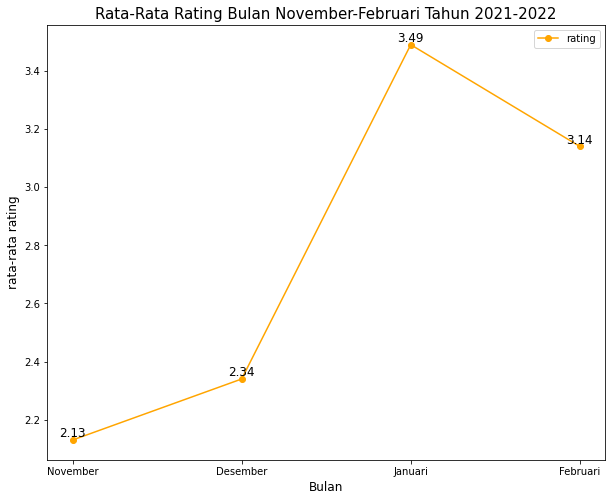

In [ ]:
fig = plt.figure (figsize= (10,8))
plt.plot(grafik_rating.Bulan, grafik_rating.Rating, label='rating', color='orange', marker='o')
plt.title('Rata-Rata Rating Bulan November-Februari Tahun 2021-2022', fontsize=15, color='black')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('rata-rata rating', fontsize=12)

def anotation_data (data_y, color_text):
  for i,j in zip(grafik_rating.Bulan, data_y):
    plt.annotate(str(j), xy=(i,j), color=color_text,
                 fontsize='large', weight='normal',
                 horizontalalignment = 'center',
                 verticalalignment='bottom'
                 )
    
anotation_data(grafik_rating.Rating, 'black')

plt.legend()
plt.show()

In [ ]:
versi = sorteddata[["versi", "rating"]]
versi

,versi,rating
0,4.1.0,5
1,4.0.8,5
2,4.1.0,1
3,4.1.0,4
4,4.1.0,5
...,...,...
49995,3.4.4,5
49996,3.4.4,2
49997,3.4.4,3
49998,3.4.4,1


In [ ]:
sorteddata.versi.unique()

array(['4.1.0', '4.0.8', '3.4.5', '4.0.9', '3.4.6', '4.0.91', '4.0.5',
       '4.0.6', '4.0.7', '4.0.2', '3.4.4'], dtype=object)

In [ ]:
rating = {}
df_sementara = versi 

for k in versi.versi.unique():
    df_sementara = versi[versi['versi'] == k]
    rating[k] = df_sementara.rating.iloc[0].mean()

print(rating)

{'4.1.0': 5.0, '4.0.8': 5.0, '3.4.5': 5.0, '4.0.9': 3.0, '3.4.6': 5.0, '4.0.91': 5.0, '4.0.5': 5.0, '4.0.6': 5.0, '4.0.7': 4.0, '4.0.2': 5.0, '3.4.4': 1.0}


In [ ]:
df_score_by_version = pd.DataFrame(rating.items())
df_score_by_version

,0,1
0,4.1.0,5.0
1,4.0.8,5.0
2,3.4.5,5.0
3,4.0.9,3.0
4,3.4.6,5.0
5,4.0.91,5.0
6,4.0.5,5.0
7,4.0.6,5.0
8,4.0.7,4.0
9,4.0.2,5.0


<function matplotlib.pyplot.show>

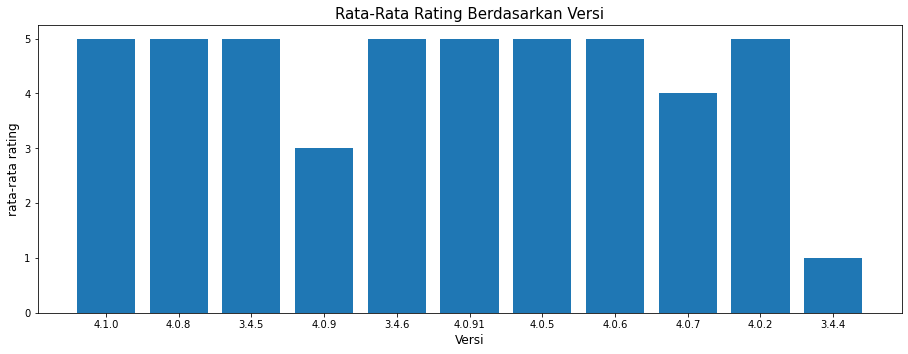

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(df_score_by_version[0], df_score_by_version[1])
plt.xlabel('Versi', fontsize=12)
plt.ylabel('rata-rata rating', fontsize=12)
plt.title('Rata-Rata Rating Berdasarkan Versi', fontsize=15, color='black')
plt.show

# Text Mining

* Case Folding
* Tokenizing
* Filtering (Stopword Removal)
* Lemmatization






Case Folding

In [ ]:
import re

In [ ]:
scrapeddata = pd.read_csv("/content/drive/My Drive/TA/hasilpreprocessing.csv")
scrapeddata

,review,rating,versi,date
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23
...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18


In [ ]:
import string

In [ ]:
def casefoldingText(review):
    review = re.sub(r'[0-9]+', '', review) # menghapus angka
    review = re.sub(r"http\S+", '', review) # menghapus link

    review = review.lower() # mengubah mengubah semua text menjadi huruf kecil
    review = review.translate(str.maketrans('', '', string.punctuation)) # menghapus tanda baca
    review = review.strip('') # menghapus spasi/karakter kosong
    return review

scrapeddata['casefolding'] = scrapeddata['review'].apply(lambda x: casefoldingText(x))

In [ ]:
scrapeddata

,review,rating,versi,date,casefolding
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48,setelah update sertifikat malah hilang padahal...
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24,saya sudah divaksin kali alhamdulillah sehat ...
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08,masalah mengatur tanggal nya bikin kesel😡
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01,cukup pake no nik saja apakah sudah vaksin tid...
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23,ngikut aja bos
...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27,tolong dong klo bikin sertifikat vaksin tangga...
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43,jadi bingung sama aplikasi ini saya sdh kalu...
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17,aplikasinya bagustapi sayang untuk scan barcod...
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18,sudah di vaksin sudah masukin data tapi ga ada...


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 7.6 MB/s 


In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tokenizingText(review): # proses memisahkan teks menjadi potongan token 
    review = word_tokenize(review) #memisahkan kalimat menjadi potongan kata yang disebut token
    return review
scrapeddata['tokenizing'] = scrapeddata['casefolding'].apply(lambda x: filteringText(x))
scrapeddata

,review,rating,versi,date,casefolding,stopword_removal,tokenizing
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48,setelah update sertifikat malah hilang padahal...,"[S, e, t, e, l, a, h, , u, p, d, a, t, e, ,, ...","[s, e, t, e, l, a, h, , u, p, d, a, t, e, , ..."
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24,saya sudah divaksin kali alhamdulillah sehat ...,"[s, a, y, a, , s, u, d, a, h, , d, i, v, a, ...","[s, a, y, a, , s, u, d, a, h, , d, i, v, a, ..."
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08,masalah mengatur tanggal nya bikin kesel😡,"[m, a, s, a, l, a, h, , m, e, n, g, a, t, u, ...","[m, a, s, a, l, a, h, , m, e, n, g, a, t, u, ..."
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01,cukup pake no nik saja apakah sudah vaksin tid...,"[C, u, k, u, p, , p, a, k, e, , n, o, , n, ...","[c, u, k, u, p, , p, a, k, e, , n, o, , n, ..."
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23,ngikut aja bos,"[N, g, i, k, u, t, , a, j, a, , b, o, s]","[n, g, i, k, u, t, , a, j, a, , b, o, s]"
...,...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27,tolong dong klo bikin sertifikat vaksin tangga...,"[T, o, l, o, n, g, , d, o, n, g, , k, l, o, ...","[t, o, l, o, n, g, , d, o, n, g, , k, l, o, ..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43,jadi bingung sama aplikasi ini saya sdh kalu...,"[J, a, d, i, , b, i, n, g, u, n, g, , s, a, ...","[j, a, d, i, , b, i, n, g, u, n, g, , s, a, ..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17,aplikasinya bagustapi sayang untuk scan barcod...,"[A, p, l, i, k, a, s, i, n, y, a, , b, a, g, ...","[a, p, l, i, k, a, s, i, n, y, a, , b, a, g, ..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18,sudah di vaksin sudah masukin data tapi ga ada...,"[S, u, d, a, h, , d, i, , v, a, k, s, i, n, ...","[s, u, d, a, h, , d, i, , v, a, k, s, i, n, ..."


In [ ]:
def filteringText(review): # menghapus stopword/kata-kata yang memiliki arti rendah
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for rvw in review:
        if rvw not in listStopwords:
            filtered.append(rvw)
    review = filtered 
    return review

scrapeddata['stopword_removal'] = scrapeddata['review'].apply(lambda x: filteringText(x))
scrapeddata

,review,rating,versi,date,casefolding,stopword_removal
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48,setelah update sertifikat malah hilang padahal...,"[S, e, t, e, l, a, h, , u, p, d, a, t, e, ,, ..."
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24,saya sudah divaksin kali alhamdulillah sehat ...,"[s, a, y, a, , s, u, d, a, h, , d, i, v, a, ..."
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08,masalah mengatur tanggal nya bikin kesel😡,"[m, a, s, a, l, a, h, , m, e, n, g, a, t, u, ..."
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01,cukup pake no nik saja apakah sudah vaksin tid...,"[C, u, k, u, p, , p, a, k, e, , n, o, , n, ..."
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23,ngikut aja bos,"[N, g, i, k, u, t, , a, j, a, , b, o, s]"
...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27,tolong dong klo bikin sertifikat vaksin tangga...,"[T, o, l, o, n, g, , d, o, n, g, , k, l, o, ..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43,jadi bingung sama aplikasi ini saya sdh kalu...,"[J, a, d, i, , b, i, n, g, u, n, g, , s, a, ..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17,aplikasinya bagustapi sayang untuk scan barcod...,"[A, p, l, i, k, a, s, i, n, y, a, , b, a, g, ..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18,sudah di vaksin sudah masukin data tapi ga ada...,"[S, u, d, a, h, , d, i, , v, a, k, s, i, n, ..."
